Parámetros estimados (a, b, c): [ 9.91462098e-02  1.79420115e-04 -1.45647557e+00]
Errores estándar de los parámetros estimados: [6.11939140e-04 1.32302460e-06 8.66693166e-03]
Intervalos de confianza al 95%:
Parámetro 0: [0.0979208228090866, 0.1003715967889193]
Parámetro 1: [0.00017677080439612878, 0.00018206942652225787]
Parámetro 2: [-1.4738307980684244, -1.439120335495977]


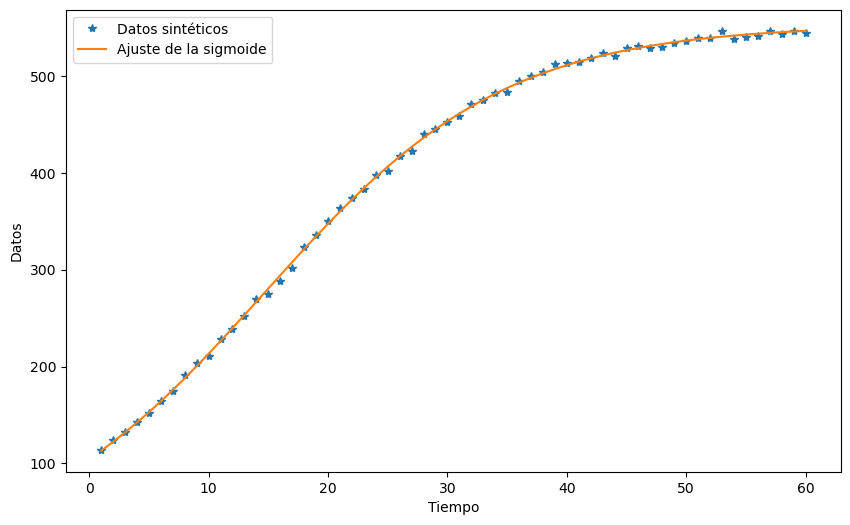

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import t

# Definición de la función sigmoide
def sigmoide(t, a, b, c):
   # return  np.exp(a * t + c) / (1 + np.exp(a * t  + c))
  return (a / b) * np.exp(a * t + c) / (1 + np.exp(a * t + c))

# Datos sintéticos
np.random.seed(0)  # Para reproducibilidad
x0 = 100
aa = 0.1
bb = 0.000182426
cc = -1.5
t_Data = np.arange(1, 61)
x_Data = (aa / bb) * np.exp(aa * t_Data + cc) / (1 + np.exp(aa * t_Data + cc)) + 10* np.random.rand(len(t_Data))

# Regresión logarítmica
#par_0 = np.abs(np.random.rand(3))
par_0=[0.01,0.001,0.5]
par_opt, par_cov = curve_fit(sigmoide, t_Data, x_Data, p0=par_0)

# Errores estándar de los parámetros estimados
perr = np.sqrt(np.diag(par_cov))

# Intervalos de confianza al 95%
alpha = 0.05
n = len(x_Data)
dof = max(0, n - len(par_opt)) # Grados de libertad
t_value = abs(t.ppf(alpha / 2, dof))

ci = np.zeros((len(par_opt), 2))
for i in range(len(par_opt)):
    ci[i] = par_opt[i] - t_value * perr[i], par_opt[i] + t_value * perr[i]

# Imprimir parámetros estimados con sus errores estándar y intervalos de confianza
print("Parámetros estimados (a, b, c):", par_opt)
print("Errores estándar de los parámetros estimados:", perr)
print("Intervalos de confianza al 95%:")
for i in range(len(par_opt)):
    print(f"Parámetro {i}: [{ci[i, 0]}, {ci[i, 1]}]")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_Data, x_Data, '*', label='Datos sintéticos')
plt.plot(t_Data, sigmoide(t_Data, *par_opt), '-', label='Ajuste de la sigmoide')
plt.xlabel('Tiempo')
plt.ylabel('Datos')
plt.legend()
plt.show()

In [33]:
# Imprimir parámetros estimados con sus errores estándar y intervalos de confianza
print("Parámetros estimados (a, b, c):", par_opt)
print("Matriz de covarianza:",par_cov)
print("Errores estándar de los parámetros estimados:", perr)
print("Intervalos de confianza al 95%:", ci)

Parámetros estimados (a, b, c): [ 9.91462098e-02  1.79420115e-04 -1.45647557e+00]
Matriz de covarianza: [[ 3.74469511e-07  8.00698660e-10 -4.19434385e-06]
 [ 8.00698660e-10  1.75039409e-12 -8.29806760e-09]
 [-4.19434385e-06 -8.29806760e-09  7.51157045e-05]]
Errores estándar de los parámetros estimados: [6.11939140e-04 1.32302460e-06 8.66693166e-03]
Intervalos de confianza al 95%: [[ 9.79208228e-02  1.00371597e-01]
 [ 1.76770804e-04  1.82069427e-04]
 [-1.47383080e+00 -1.43912034e+00]]


#### par_cov representa la matriz de covarianza de los parámetros estimados por el método de ajuste de curva. En el contexto de la función curve_fit de scipy.optimize, par_cov es la covarianza entre los parámetros estimados durante el ajuste de la curva.

#### La covarianza es una m edida de cómo dos variables cambian juntas. En este caso, la matriz de covarianza pcov proporciona información sobre cómo los parámetros estimados se relacionan entre sí. Los elementos diagonales de pcov representan las varianzas de los parámetros estimados, mientras que los elementos fuera de la diagonal representan las covarianzas entre los parámetros.

#### Es importante tener en cuenta que la covarianza entre dos parámetros puede indicar si están correlacionados entre sí. Por ejemplo, una covarianza positiva entre dos parámetros indica que tienden a aumentar juntos, mientras que una covarianza negativa indica que tienden a cambiar en direcciones opuestas.

#### La matriz de covarianza pcov se utiliza comúnmente para estimar los errores estándar de los parámetros estimados, así como para calcular intervalos de confianza y realizar pruebas de hipótesis sobre los parámetros del modelo ajustado.

In [34]:
#Calcular el valor t
t_value = par_opt / perr

# Calcular el valor p
dof = len(par_opt) - 1  # Grados de libertad
p_value = 2 * (1 - t.cdf(abs(t_value), dof))  # Valor p de dos colas

# Imprimir los resultados
print("Valor t para cada parámetro:", t_value)
print("Valor p para cada parámetro:", p_value)

Valor t para cada parámetro: [ 162.01972279  135.61358977 -168.04973468]
Valor p para cada parámetro: [3.80924946e-05 5.43698526e-05 3.54079898e-05]


#### En el contexto de los intervalos de confianza, el valor t se utiliza para determinar la cantidad de desviación estándar que se aleja del valor medio de la distribución de la muestra. En otras palabras, se utiliza para calcular el tamaño del intervalo de confianza y ajustarlo según el nivel de confianza deseado. Un valor t más alto indica que el intervalo de confianza es más amplio, lo que significa que hay más incertidumbre en la estimación del parámetro.

#### El valor p se utiliza para determinar la significancia estadística de un resultado en una prueba de hipótesis. Representa la probabilidad de observar un resultado al menos tan extremo como el observado, bajo la suposición de que la hipótesis nula es verdadera. En general, si el valor p es menor que un umbral predefinido (como 0.05), se rechaza la hipótesis nula en favor de la hipótesis alternativa. Un valor p más bajo indica una mayor evidencia en contra de la hipótesis nula.

#### En el contexto del código anterior, la hipótesis nula se refiere a la afirmación de que los parámetros del modelo no tienen efecto o no son significativamente diferentes de cero. En otras palabras, la hipótesis nula asume que no hay relación entre las variables independientes (en este caso, el tiempo) y la variable dependiente (los datos observados).


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3836\281795617.py:4: RuntimeWarning: divide by zero encountered in true_divide
  logit_x_Data = np.log(x_Data_norm / (1 - x_Data_norm))


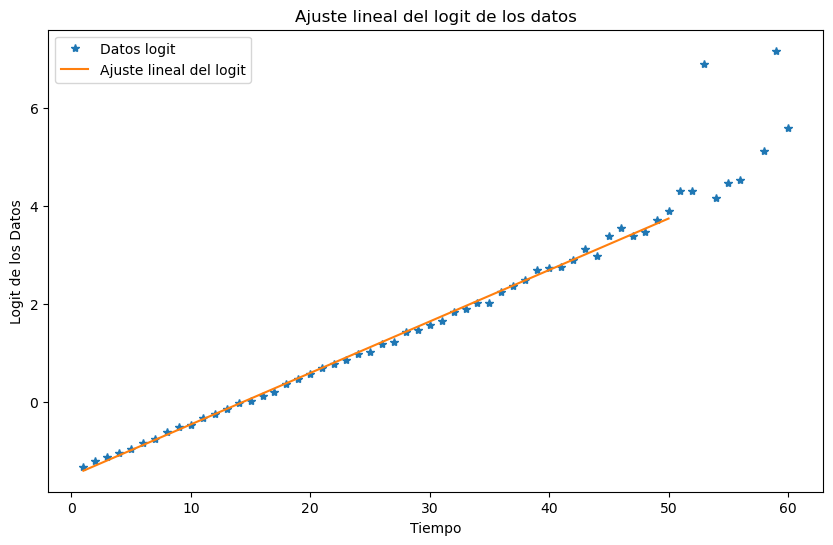

Pendiente del ajuste lineal: 0.10519636302584537
Intercepto del ajuste lineal: -1.5149680917063924
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.038e+04
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           9.18e-65
Time:                        21:08:40   Log-Likelihood:                 59.461
No. Observations:                  50   AIC:                            -114.9
Df Residuals:                      48   BIC:                            -111.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [35]:
import statsmodels.api as sm
x_Data_norm = (1 / np.max(x_Data)) * x_Data #Ojo datos normalizados
#x_Data_norm = (bb/aa) * x_Data #Ojo datos normalizados
logit_x_Data = np.log(x_Data_norm / (1 - x_Data_norm))
#logit_x_Data = np.log(x_Data/ (1 - x_Data))

# Ajuste lineal del logit con statsmodels
t_Data_with_const = sm.add_constant(t_Data[:-10])  # Agrega una columna de unos para el intercepto
model = sm.OLS(logit_x_Data[:-10], t_Data_with_const)
results = model.fit()

# Parámetros del modelo lineal
intercepto, pendiente = results.params

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_Data, logit_x_Data, '*', label='Datos logit')
plt.plot(t_Data[:-10], results.predict(t_Data_with_const), '-', label='Ajuste lineal del logit')
plt.xlabel('Tiempo')
plt.ylabel('Logit de los Datos')
plt.legend()
plt.title('Ajuste lineal del logit de los datos')
plt.show()

print("Pendiente del ajuste lineal:", pendiente)
print("Intercepto del ajuste lineal:", intercepto)

print(results.summary())

#### El AIC es una medida de la calidad del ajuste de un modelo que penaliza la complejidad del modelo. Cuanto menor sea el valor de AIC, mejor se ajusta el modelo a los datos.  El AIC=2k−2ln(L) donde k es el número de parámetros en el modelo y L s la verosimilitud máxima del modelo. El AIC favorece modelos que ajustan bien los datos pero tienen un número menor de parámetros, lo que ayuda a evitar el  sobreajuste.
#### El BIC es similar al AIC pero penaliza más fuertemente la complejidad del modelo. Se basa en principios bayesianos y tiende a seleccionar modelos más simples que el AIC. El BIC se calcula utilizando la siguiente fórmula: BIC=kln(n)−2ln(L) donde n es el número de observaciones en los datos. Al igual que el AIC, el BIC favorece modelos que ajustan bien los datos pero tienen menos parámetros. Sin embargo, el BIC penaliza la complejidad del modelo más fuertemente que el AIC. Ambos criterios se utilizan para comparar modelos alternativos y seleccionar el modelo que mejor se ajuste a los datos, teniendo en cuenta tanto la bondad del ajuste como la complejidad del modelo. En general, se prefiere un modelo con un valor de AIC o BIC más bajo, lo que indica un mejor equilibrio entre el ajuste y la complejidad del modelo.

# COMPARACIÓN ENTRE LOS DOS MODELOS, EL SINTÉTICO Y EL LINEAL

In [36]:
a=round(pendiente,8)
c=round(intercepto,8)
x0=x_Data[0]
b = a * np.exp(c) / ((1 + np.exp(c)) * x0)
par_opt_lin = np.array([a, b, c])

In [37]:
print(par_opt)
print(par_opt_lin)

[ 9.91462098e-02  1.79420115e-04 -1.45647557e+00]
[ 1.05196360e-01  1.66397686e-04 -1.51496809e+00]


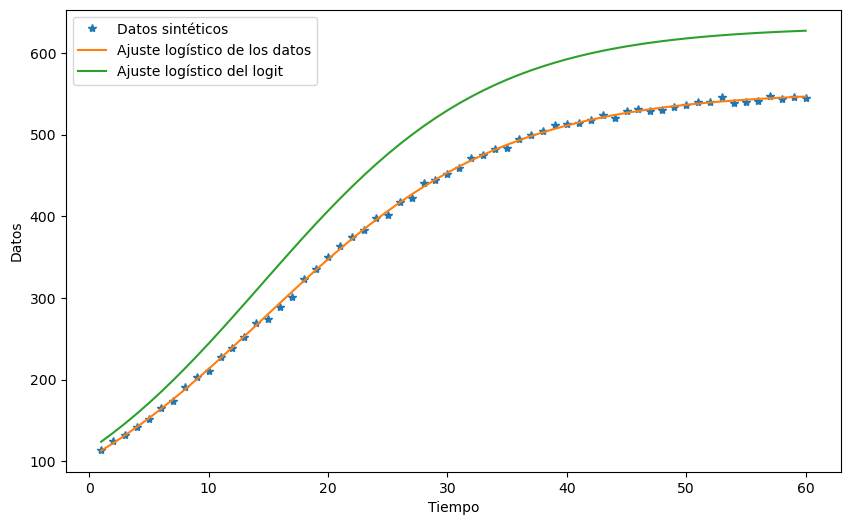

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(t_Data, x_Data, '*', label='Datos sintéticos')
plt.plot(t_Data, sigmoide(t_Data, *par_opt), '-', label='Ajuste logístico de los datos')
plt.plot(t_Data, sigmoide(t_Data, *par_opt_lin), '-', label='Ajuste logístico del logit')
plt.xlabel('Tiempo')
plt.ylabel('Datos')
plt.legend()
plt.show()

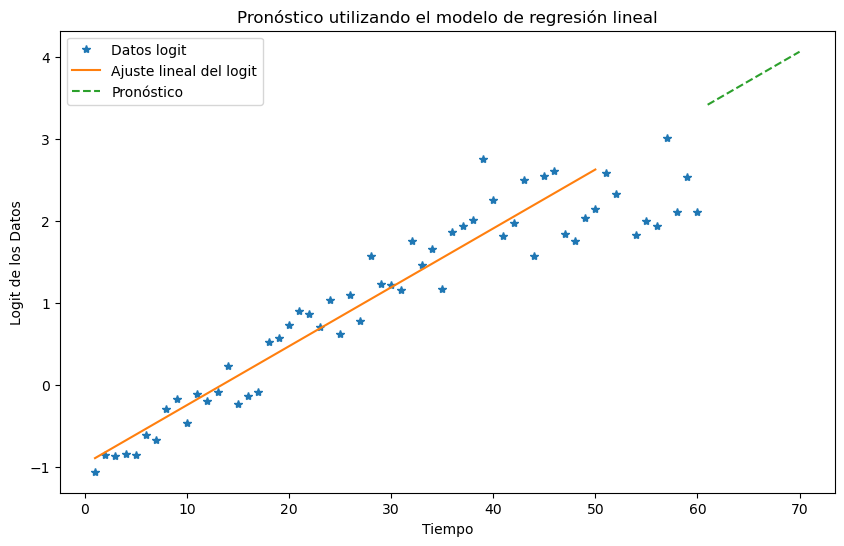

Pronóstico en la escala original: [0.96823043 0.97036815 0.97236613 0.97423298 0.97597682 0.97760536
 0.97912585 0.98054517 0.98186977 0.98310574]


In [152]:
# Crear un vector de tiempo para los datos de pronóstico
t_pronostico = np.arange(61, 71)  # Por ejemplo, para predecir los próximos 10 períodos

# Agregar una columna de unos para el intercepto
t_pronostico_with_const = sm.add_constant(t_pronostico)

# Pronóstico utilizando el modelo ajustado
pronostico_logit = results.predict(t_pronostico_with_const)

# Graficar el pronóstico junto con los datos originales
plt.figure(figsize=(10, 6))
plt.plot(t_Data, logit_x_Data, '*', label='Datos logit')
plt.plot(t_Data[:-10], results.predict(t_Data_with_const), '-', label='Ajuste lineal del logit')
plt.plot(t_pronostico, pronostico_logit, '--', label='Pronóstico')
plt.xlabel('Tiempo')
plt.ylabel('Logit de los Datos')
plt.legend()
plt.title('Pronóstico utilizando el modelo de regresión lineal')
plt.show()

# Convertir el pronóstico de logit a la escala original
pronostico_original = np.exp(pronostico_logit) / (1 + np.exp(pronostico_logit))

print("Pronóstico en la escala original:", pronostico_original)

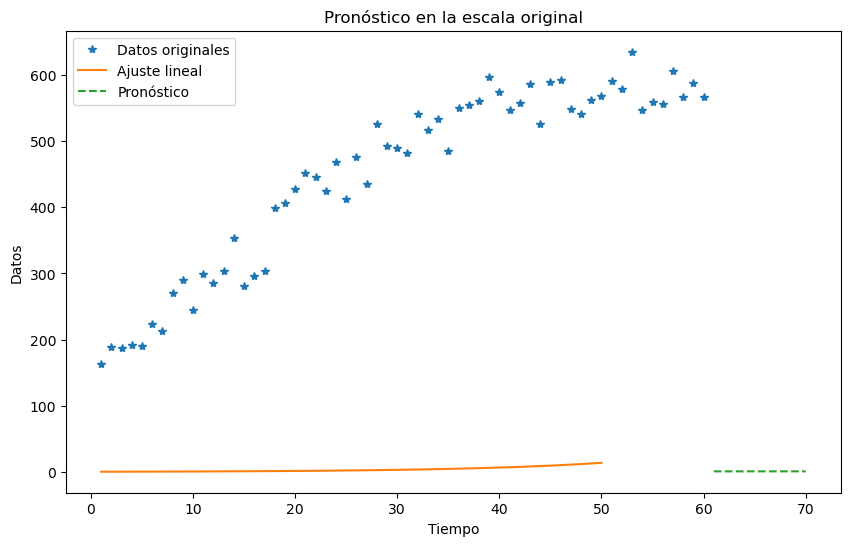

In [154]:
# Convertir el pronóstico de logit a la escala original
pronostico_original = np.exp(pronostico_logit) / (1 + np.exp(pronostico_logit))

# Graficar el pronóstico junto con los datos originales y la línea de ajuste
plt.figure(figsize=(10, 6))
plt.plot(t_Data, x_Data, '*', label='Datos originales')
plt.plot(t_Data[:-10], np.exp(results.predict(t_Data_with_const)), '-', label='Ajuste lineal')
plt.plot(t_pronostico, pronostico_original, '--', label='Pronóstico')
plt.xlabel('Tiempo')
plt.ylabel('Datos')
plt.legend()
plt.title('Pronóstico en la escala original')
plt.show()

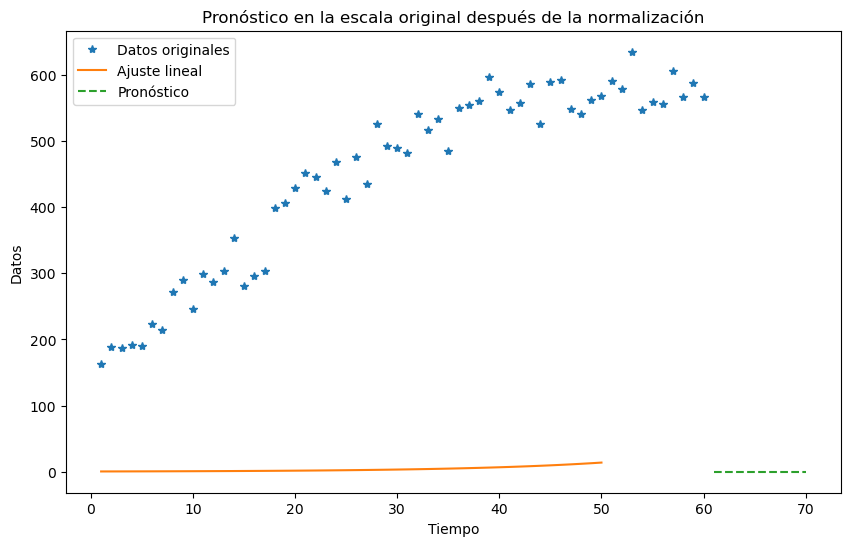

In [155]:
# Convertir el pronóstico de logit a la escala original
pronostico_original = np.exp(pronostico_logit) / (1 + np.exp(pronostico_logit))

# Deshacer la normalización para obtener los pronósticos en la escala original
pronostico_original_desnormalizado = (1 / np.max(x_Data)) * pronostico_original

# Graficar el pronóstico junto con los datos originales y la línea de ajuste
plt.figure(figsize=(10, 6))
plt.plot(t_Data, x_Data, '*', label='Datos originales')
plt.plot(t_Data[:-10], np.exp(results.predict(t_Data_with_const)), '-', label='Ajuste lineal')
plt.plot(t_pronostico, pronostico_original_desnormalizado, '--', label='Pronóstico')
plt.xlabel('Tiempo')
plt.ylabel('Datos')
plt.legend()
plt.title('Pronóstico en la escala original después de la normalización')
plt.show()